#Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

(0.0, 512.0)

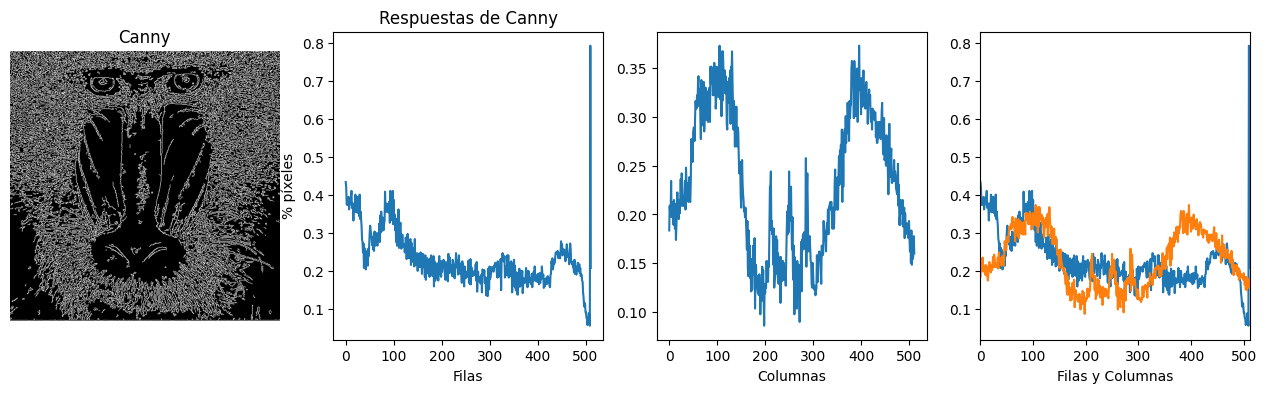

In [37]:
img = cv2.imread('mandril.jpg') 

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(gris, 100, 200)

#Cuenta el número de píxeles blancos (255) por fila y por columna
#Suma los valores de los pixeles por fila y por columna
fila_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
filas = fila_counts[:,0] / (255 * canny.shape[1])
cols = col_counts[0] / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 4, 2)
plt.title("Respuestas de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(filas)

plt.subplot(1, 4, 3)
plt.xlabel("Columnas")
plt.plot(cols)

plt.subplot(1, 4, 4)
plt.xlabel("Filas y Columnas")
plt.plot(filas)
plt.plot(cols)

#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])



TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

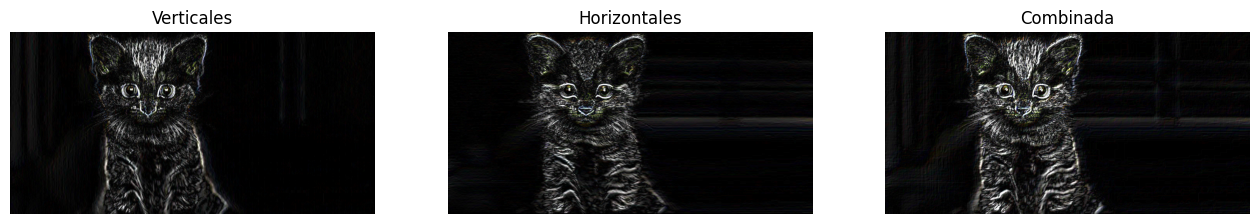

In [40]:
img = cv2.imread('gatito.jpeg') 

# Gaussiana para suavizar la imagen original
ggris = cv2.GaussianBlur(img, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure(figsize=(16, 3))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combinada')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
plt.show()

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

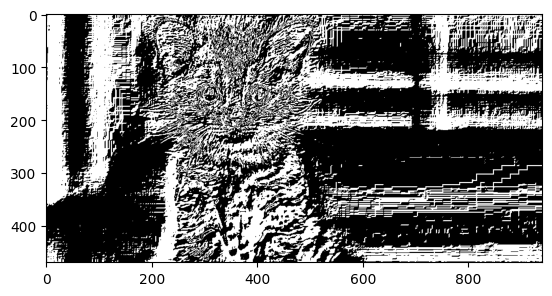

(0.0, 470.0)

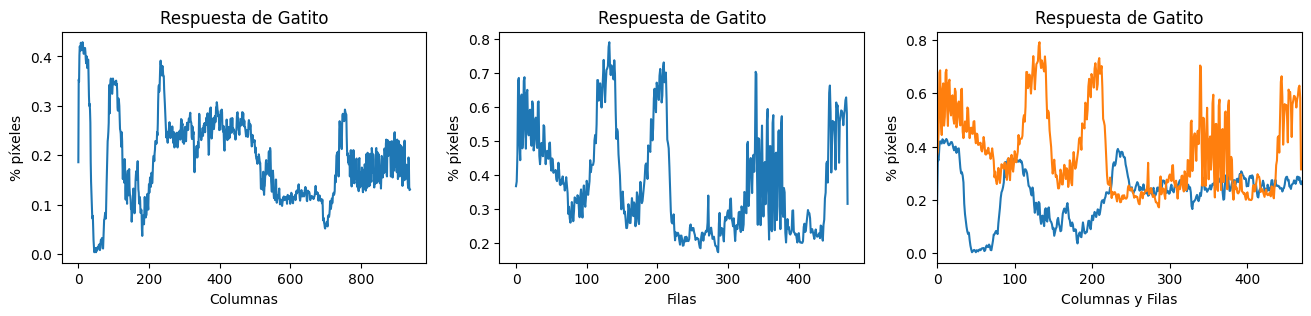

In [53]:
img = cv2.imread('gatito.jpeg') 
#Conversión a grises de la original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gris, cmap='gray') 

# Gaussiana para suavizar la imagen original
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

sobel8 = np.uint8(sobel)

#Define valor umbral
valorUmbral = 130 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
fila_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * imagenUmbralizada.shape[1])
filas = fila_counts[:,0] / (255 * imagenUmbralizada.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(16, 3))
plt.subplot(1, 3, 1)
plt.title("Respuesta de Gatito")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)

plt.subplot(1, 3, 2)
plt.title("Respuesta de Gatito")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(filas)

plt.subplot(1, 3, 3)
plt.title("Respuesta de Gatito")
plt.xlabel("Columnas y Filas")
plt.ylabel("% píxeles")
plt.plot(cols)
plt.plot(filas)
#Rango en x definido por las columnas
plt.xlim([0, imagenUmbralizada.shape[0]])


TAREA: Asumiendo que quieren mostrar a personas que no forman parte del curso de VC el comportamiento de una o varias funcioens de las vistas hasta este momento aplicadas sobre la entrada de la webcam. ¿Cuál(es) escogerían?

In [57]:
vid = cv2.VideoCapture(0)

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)

        valorUmbral = 130 #Prueba otros valores
        #Obtiene imagen umbralizada para dicho valor definido
        res,imagenUmbralizada = cv2.threshold(framem, valorUmbral, 255, cv2.THRESH_BINARY)
                
        cv2.imshow('Filtro', imagenUmbralizada)
  
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) propongan (los componentes de cada grupo) una reinterpretación del procesamiento de imágenes con las técnicas vistas o que conozcan.

In [4]:
vid = cv2.VideoCapture(0)

# Carga la imagen que deseas superponer
overlay_image = cv2.imread('careta.png', cv2.IMREAD_UNCHANGED)

# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while(True):      
    
    ret, frame = vid.read()

    if ret == False: break
    
    # Detecta las caras en el fotograma utilizando el clasificador de cascada
    # con un factor de escala de 1.3 y 5 vecinos mínimos
    faces = faceClassif.detectMultiScale(frame, 1.3,5)
    
    for (x,y,w,h) in faces:
                
        # Redimensiona la imagen para que coincida con el tamaño de la cara
        overlay = cv2.resize(overlay_image, (w, h))
        
        # Obtiene la región de la cara en el fotograma
        n_frame = frame[y:y+h, x:x+w]
        
        # Obtiene la máscara de transparencia del overlay
        mask = overlay[:, :, 3]
        
        # Invierte la máscara para obtener la región opuesta
        mask_inv = cv2.bitwise_not(mask)
        
        # Aplica la máscara a la imagen overlay para obtener la región de la cara
        bg_black = cv2.bitwise_and(overlay, overlay, mask=mask)
        bg_black = bg_black[:,:,0:3]
        
        # Aplica la máscara inversa a la región del fotograma para obtener la región opuesta
        bg_frame = cv2.bitwise_and(n_frame, n_frame, mask=mask_inv)
        
        # Combina la región de la cara y la región opuesta
        result = cv2.add(bg_black, bg_frame)
        
        # Superpone la imagen en el fotograma
        frame[y:y+h, x:x+w] = result
    
    cv2.imshow('Frame', frame)
  
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()